<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
#https://www.cs.toronto.edu/~kriz/cifar.html
X_train.shape

In [ ]:
X_train.shape

In [ ]:
X_train[0]

In [ ]:
X_train.shape

In [ ]:
y_test.shape

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

In [ ]:
y_train[:5]

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [20]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
y_test = y_test.reshape(-1,)

In [22]:
#https://www.cs.toronto.edu/~kriz/cifar.html
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
classes[8]

'ship'

Let's plot some images to see what they are 

In [23]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

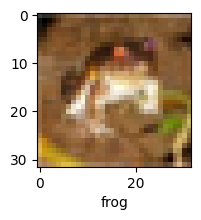

In [24]:
plot_sample(X_train, y_train, 0)

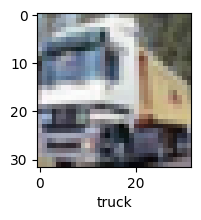

In [25]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [28]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\techlanders\test\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.3020 - loss: 1.9307
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.4175 - loss: 1.6482
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.4481 - loss: 1.5624
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4768 - loss: 1.4920
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4924 - loss: 1.4453


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [30]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.41      0.51      1000
           1       0.67      0.44      0.53      1000
           2       0.42      0.35      0.38      1000
           3       0.33      0.40      0.36      1000
           4       0.51      0.32      0.39      1000
           5       0.43      0.33      0.37      1000
           6       0.53      0.54      0.54      1000
           7       0.47      0.61      0.53      1000
           8       0.53      0.72      0.61      1000
           9       0.45      0.71      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\techlanders\test\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3698 - loss: 1.7268
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5885 - loss: 1.1648
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6454 - loss: 1.0179
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6731 - loss: 0.9323
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6925 - loss: 0.8786
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7137 - loss: 0.8247
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7311 - loss: 0.7730
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7498 - loss: 0.7197
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7581 - loss: 0.6930
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7745 - loss: 0.6467


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [38]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6869 - loss: 0.9369


[0.9468200206756592, 0.6854000091552734]

In [35]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

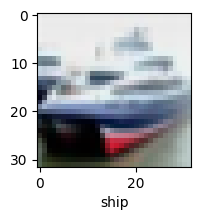

In [36]:
plot_sample(X_test,y_test,1)

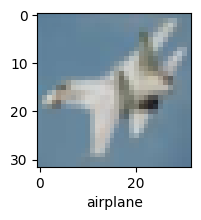

In [37]:
plot_sample(X_test,y_test,10)

In [39]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.64883537e-03, 3.44610336e-04, 9.76276770e-03, 7.74612486e-01,
        8.81706190e-04, 1.21601939e-01, 7.98910707e-02, 9.26870871e-06,
        7.37996818e-03, 3.86731373e-03],
       [7.53806205e-03, 8.96013558e-01, 2.62890535e-06, 2.85791452e-06,
        1.08559482e-06, 2.25868760e-07, 5.26026245e-09, 1.10744274e-07,
        9.29355323e-02, 3.50590423e-03],
       [1.29577845e-01, 1.30581349e-01, 1.06527880e-02, 8.90193414e-03,
        6.72109425e-03, 1.05493027e-03, 1.06164051e-04, 2.38572364e-03,
        6.50356293e-01, 5.96618690e-02],
       [8.13322246e-01, 2.33897194e-02, 3.73615809e-02, 2.46669108e-04,
        2.42291746e-04, 8.54099289e-06, 8.38990582e-06, 7.27989664e-06,
        1.25072792e-01, 3.40479630e-04],
       [1.25278717e-07, 3.89662491e-05, 1.23548135e-02, 1.05659105e-01,
        2.47911096e-01, 1.02035259e-03, 6.32962644e-01, 3.46089951e-06,
        4.84112934e-05, 1.08924678e-06]], dtype=float32)

In [42]:
np.argmax([3,60,8,50])
#it returns the index of highestvalue

1

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
# for each image , softmax activation function will create 10 values each having some probablistic value (all 10 sum = 1)
# and then argmax will calculate max value in each element in the values which softmax will provide for each image , in this case outof 10 

[3, 1, 8, 0, 6]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [53]:
y_test[0]


3

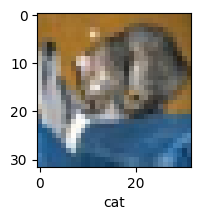

In [54]:
plot_sample(X_test, y_test,0)

In [59]:
classes[y_classes[0]]

'cat'

In [55]:
y_test[4]

6

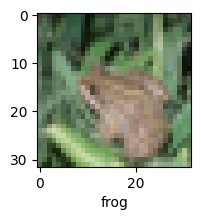

In [56]:
plot_sample(X_test, y_test,4)

In [60]:
classes[y_classes[4]]

'frog'

In [61]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.77      0.83      0.80      1000
           2       0.55      0.57      0.56      1000
           3       0.57      0.42      0.49      1000
           4       0.59      0.64      0.61      1000
           5       0.63      0.59      0.61      1000
           6       0.65      0.84      0.73      1000
           7       0.84      0.66      0.74      1000
           8       0.81      0.79      0.80      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

